# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP (he will teach the Geopanda lecture).
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [239]:

import pandas as pd
import geopandas as gp
import os
from __future__ import print_function, division
import pylab as pl
import json
from IPython.display import Image
import numpy as np
import statsmodels.api as sm
from scipy import stats

%pylab inline
print (os.getenv('PUIDATA')+'/'+'MTA_Fare.npy')

Populating the interactive namespace from numpy and matplotlib
C:/Users/ferna/PUI2016LOCAL/PUIdata/MTA_Fare.npy


## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)

## note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the no.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```


as opposed to just 

use the no.nansum etc
```
np.mean(mtarides)
np.sum(mtarides)
```

In [33]:
MTAfare = np.load(os.getenv('PUIDATA') + '/' + 'MTA_Fare.npy')
print (MTAfare.shape)
print (type(MTAfare))

MTAfare = MTAfare.astype(np.float, copy=False  )


(600L, 23L, 194L)
<type 'numpy.ndarray'>


In [38]:
MTAfare[MTAfare==-1]=np.nan
MTAfare[MTAfare==np.nan]

array([], dtype=float64)

In [41]:
faretype= np.array([])
# Create an array with the redetype
faretype = np.array(['10T', '14D', '1D', '2T', '30D', '7D', 'ADA', 'AFAS', 'EXP','EZ',
            'FF','MC','MR','month','RFM','RR','SEN','SPEC','TCMC','TKT',
            'UNL','XBUS','student'])

# Create a date range for the weeks from Sebastian Bana
rng = pd.date_range('5/21/2010', periods=194, freq='W')
rng.shape

(194L,)

In [206]:

print (np.nansum(MTAfare[:,:,1]))

print (np.nansum(MTAfare[:,:,2]))
print (np.nansum(MTAfare))
ridesperweek=np.array([])
for i in range(len(rng)):
    ridesperweek=np.append(ridesperweek,np.nansum(MTAfare[:,:,i]),)
    #ridesperweek.append(np.nansum(MTAfare[:,:,i]))
ridesperweek

29265971.0
29601189.0
5777581875.0


array([ 26720267.,  29265971.,  29601189.,  29387592.,  29185768.,
        26211666.,  28683614.,  29125646.,  28803814.,  28599546.,
        28312019.,  27931015.,  27271701.,  28250357.,  26687174.,
        30018756.,  30183790.,  29052100.,  30068614.,  29172431.,
        30327068.,  30190292.,  29987273.,  30053446.,  30128994.,
        25164391.,  29189219.,  30580790.,  30106591.,  27561217.,
        21802973.,  21796368.,  27483123.,  27112540.,  26013915.,
        26433790.,  28660073.,  29103923.,  29576628.,  26721588.,
        29180204.,  29400660.,  29880586.,  29677420.,  29525360.,
        30175740.,  30196675.,  28500091.,  29035465.,  30398309.,
        29992271.,  29953470.,  27148617.,  29850111.,  30165985.,
        29979266.,  30298087.,  26744295.,  29967687.,  29475619.,
        29253128.,  29429842.,  29063294.,  27980138.,  27924672.,
        22985008.,  28142943.,  31996089.,  32506259.,  24297825.,
        32159233.,  30747690.,  32641199.,  32904387.,  319538

In [80]:
print(shape(ridesperweek))

(194L,)


In [82]:
ridesperweek.mean()

29781349.87113402

In [85]:
ridesperweek.std()
2983960
29781349

2983960.421700886

In [86]:
numpy.std(ridesperweek, axis=None, dtype=None, out=None, ddof=0, keepdims=False)

2983960.421700886

In [108]:
outlier = np.where(((np.log10(ridesperweek))<np.log10(ridesperweek.mean()-3*ridesperweek.std()))==True)

In [114]:
outlier

(array([126], dtype=int64),)

In [120]:
rng[outlier]

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


[]

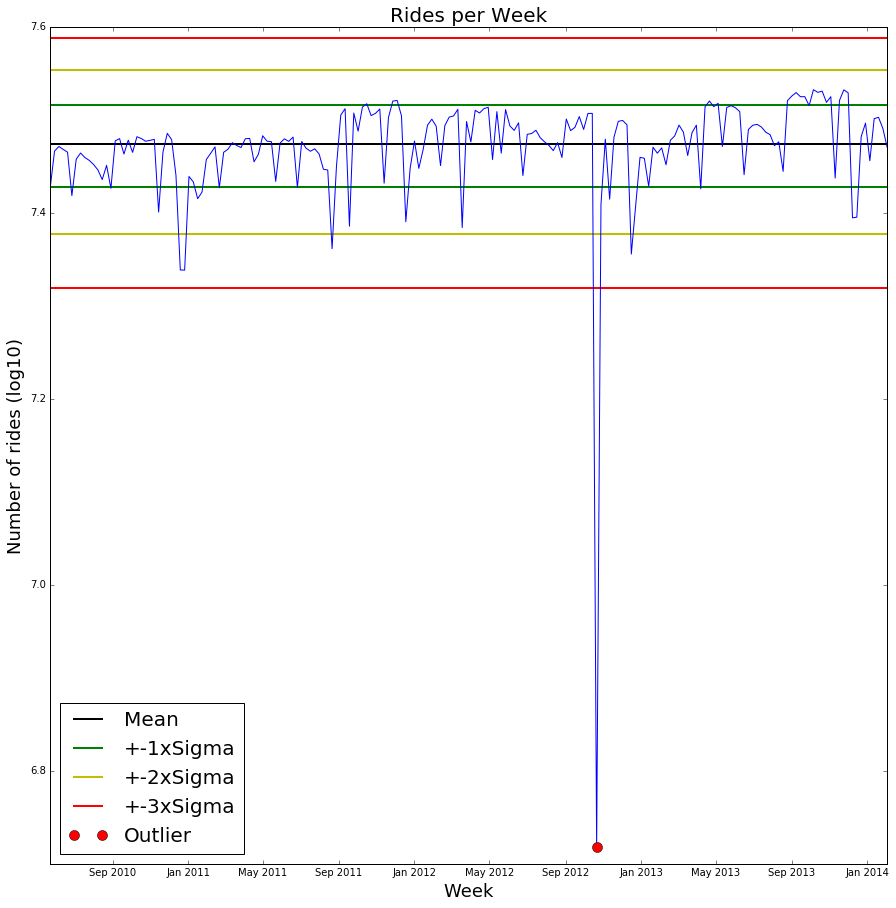

In [259]:
pl.figure(figsize = (15,15))
pl.plot(rng,np.log10(ridesperweek),'b', alpha=1)
pl.title('Rides per Week', size = 20)
pl.ylabel('Number of rides (log10)', size = 18)
pl.xlabel('Week', size = 18)
pl.axhline(y=np.log10(ridesperweek.mean()),c="k",linewidth=2,zorder=0, label='Mean')

pl.axhline(y=np.log10(ridesperweek.mean()-ridesperweek.std()) ,c="g",linewidth=2,zorder=0,label='+-1xSigma')
pl.axhline(y=np.log10(ridesperweek.mean()+ridesperweek.std()),c="g",linewidth=2,zorder=0)
pl.axhline(y=np.log10(ridesperweek.mean()-2*ridesperweek.std()),c="y",linewidth=2,zorder=0, label='+-2xSigma')
pl.axhline(y=np.log10(ridesperweek.mean()+2*ridesperweek.std()),c="y",linewidth=2,zorder=0)
pl.axhline(y=np.log10(ridesperweek.mean()-3*ridesperweek.std()),c="r",linewidth=2,zorder=0, label='+-3xSigma')
pl.axhline(y=np.log10(ridesperweek.mean()+3*ridesperweek.std()),c="r",linewidth=2,zorder=0)

pl.plot(rng[outlier],np.log10(ridesperweek[outlier]),'ro', ms=10, alpha=1, label='Outlier')

pl.legend(loc = 3, fontsize = 20)

pl.plot()

#### Figure 1.- In this plot I show the number of rides per week and identifying the different deviations from the mean (1 to 3 sigma). As well I am marking the Outlier  on the week 2012-10-21https://en.wikipedia.org/wiki/Hurricane_Sandy

## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


In [197]:
faretypesums= np.array([])
#faretypesums=np.expand_dims(faretypesums, axis=0)
print(faretypesums.shape)
#print (faretypesums[0,0])
total=np.empty([23,194], dtype=float)
print (total.shape)
len(total[0])

(0L,)
(23L, 194L)


194

In [212]:
totalfaretype=np.nansum(MTAfare, axis=0)
totalfaretype.shape

(23L, 194L)

[]

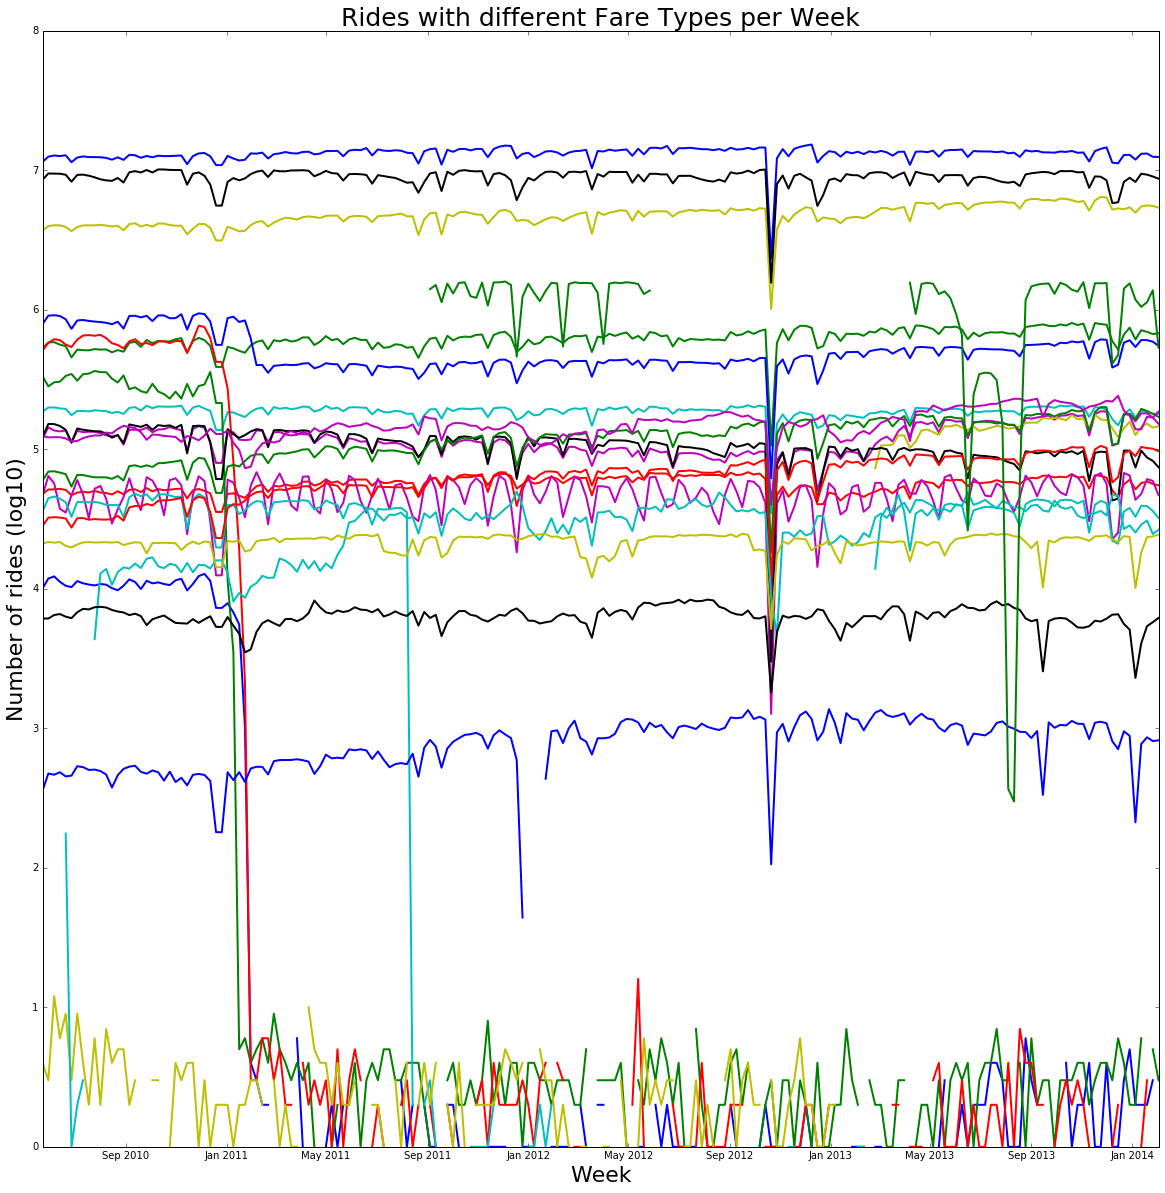

In [260]:
pl.figure(figsize=(20,20))
pl.title('Rides with different Fare Types per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(faretype)):
    pl.plot(rng, np.log10(totalfaretype[i]), linewidth=2, alpha=1)
pl.plot()

#### Figure 2.- In this plot I show the number of rides per week grouped by type of fare. This shows how the usage of different faretypes changed trhough time.

C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


[]

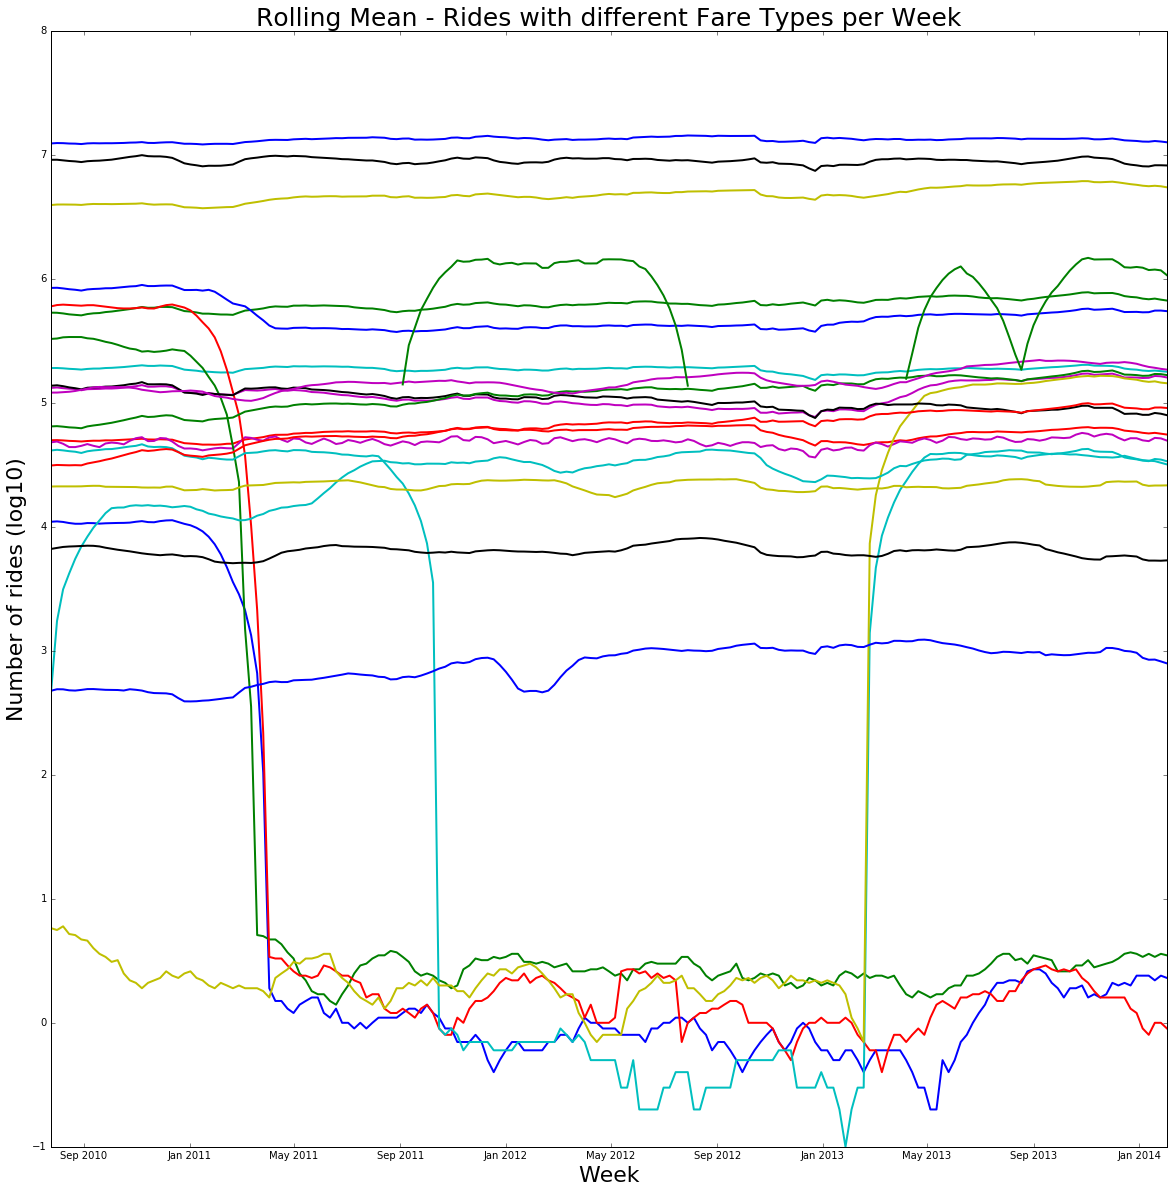

In [261]:
pl.figure(figsize=(20,20))
pl.title('Rolling Mean - Rides with different Fare Types per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(faretype)):
    pl.plot(rng, np.log10(pd.rolling_mean(totalfaretype[i], 10)), linewidth=2, alpha=1)
pl.plot()


#### Figure 3.- In this plot I show the rolled mean of rides per week grouped by type of fare. There are some faretype that do not have continuous data.

C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


[]

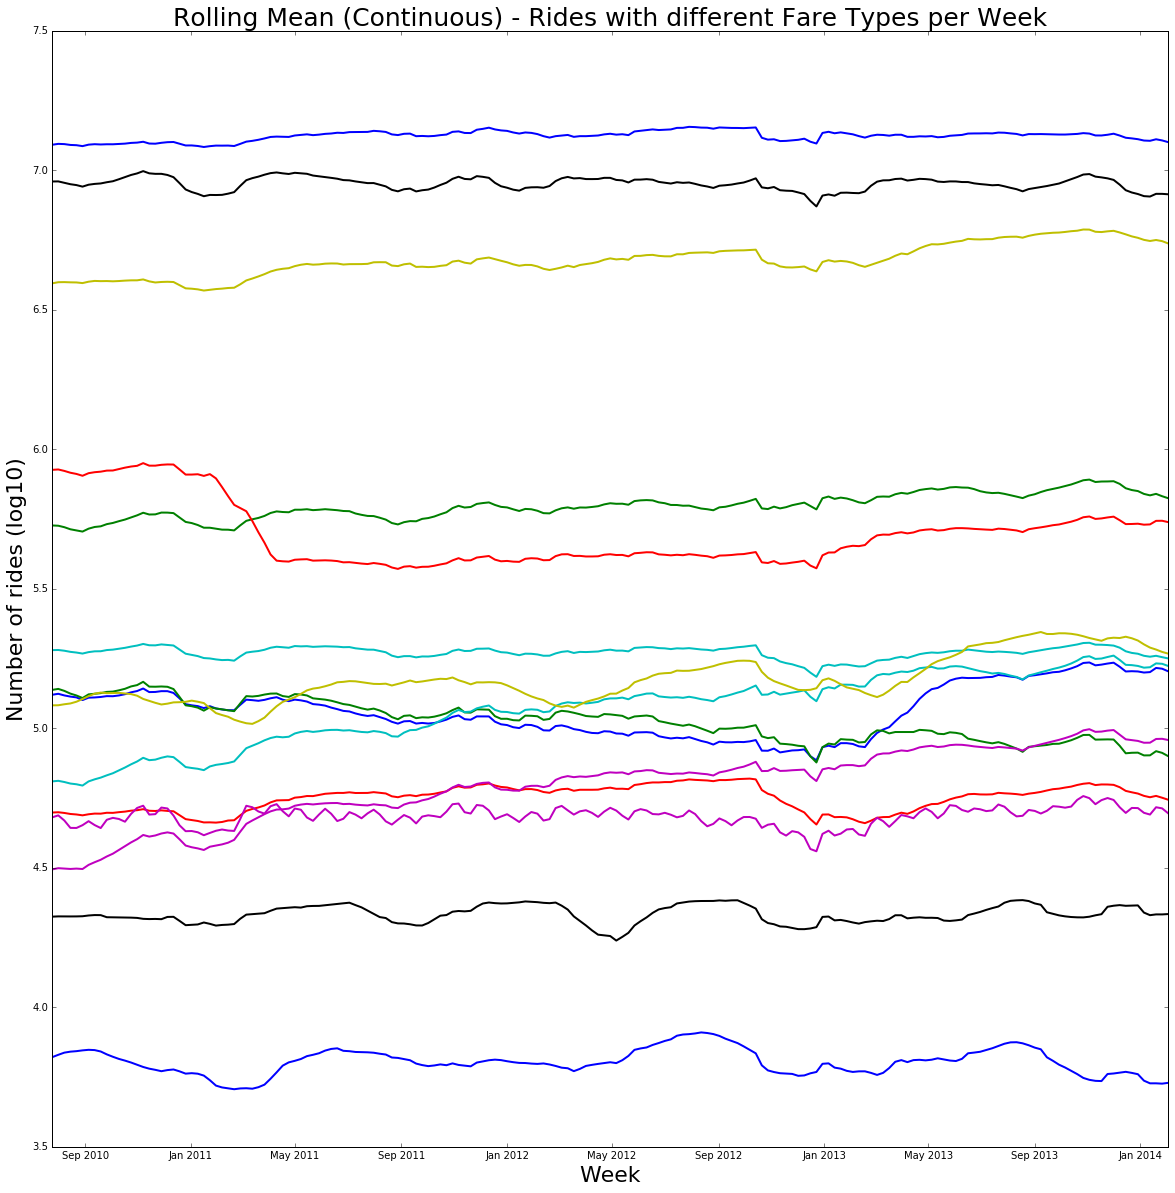

In [263]:
pl.figure(figsize=(20,20))
pl.title('Rolling Mean (Continuous) - Rides with different Fare Types per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(faretype)):
    ### consider only faretype that have data for each week
    if (np.min(totalfaretype[i])>0):
        pl.plot(rng, np.log10(pd.rolling_mean(totalfaretype[i], 10)), linewidth=2, alpha=1, label=faretype[i])
        start = totalfaretype[i,:10].sum()
        end = totalfaretype[i,-10:].sum()
        ratio=end/start
        #print (start)
        #print (ratio, i)
#pl.legend(loc = 3, fontsize = 20)
pl.plot()


#### Figure 4.- In this plot I show the rolled mean of rides per week grouped by type of fare showing only continuous. 

1.25206505277 1
1.38974760362 5
2.59295988592 15
2.90939676884 16
1.5322710627 18


C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


[]

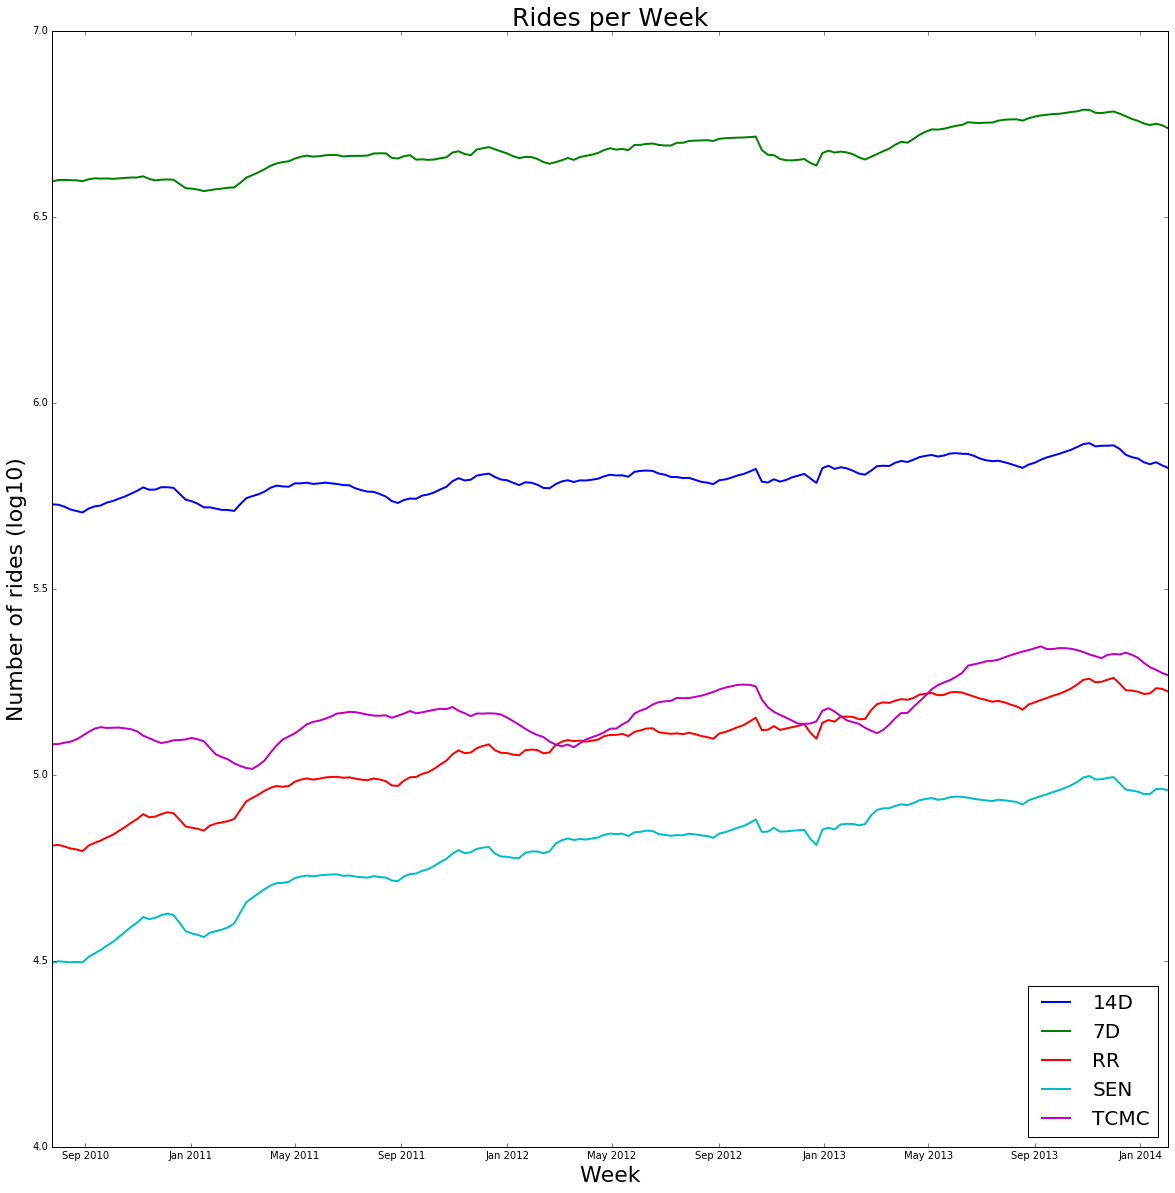

In [282]:
pl.figure(figsize=(20,20))
pl.title('Rides per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(faretype)):
    ### consider only faretype that have data for each week
    if (np.min(totalfaretype[i])>0):
        start = totalfaretype[i,:10].sum()
        end = totalfaretype[i,-10:].sum()
        ratio=end / start
        if (ratio > 1.25):
            pl.plot(rng, np.log10(pd.rolling_mean(totalfaretype[i], 10)), linewidth=2, alpha=1, label=faretype[i])
        #print (start)
            print (ratio, i)
pl.legend(loc = 4, fontsize = 20)
pl.plot()


#### Figure 5.- In this plot I show the rolled mean of rides per week grouped by type of fare showing only continuous and the ones with bigger ratio of usage change between comparing the start. we can see that the faretype with the biggest increase is SEN=Senior citizen/disabled Fare.

The ratio of usage for the Senior/Disabled Fare is =  2.90939676884


C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


[]

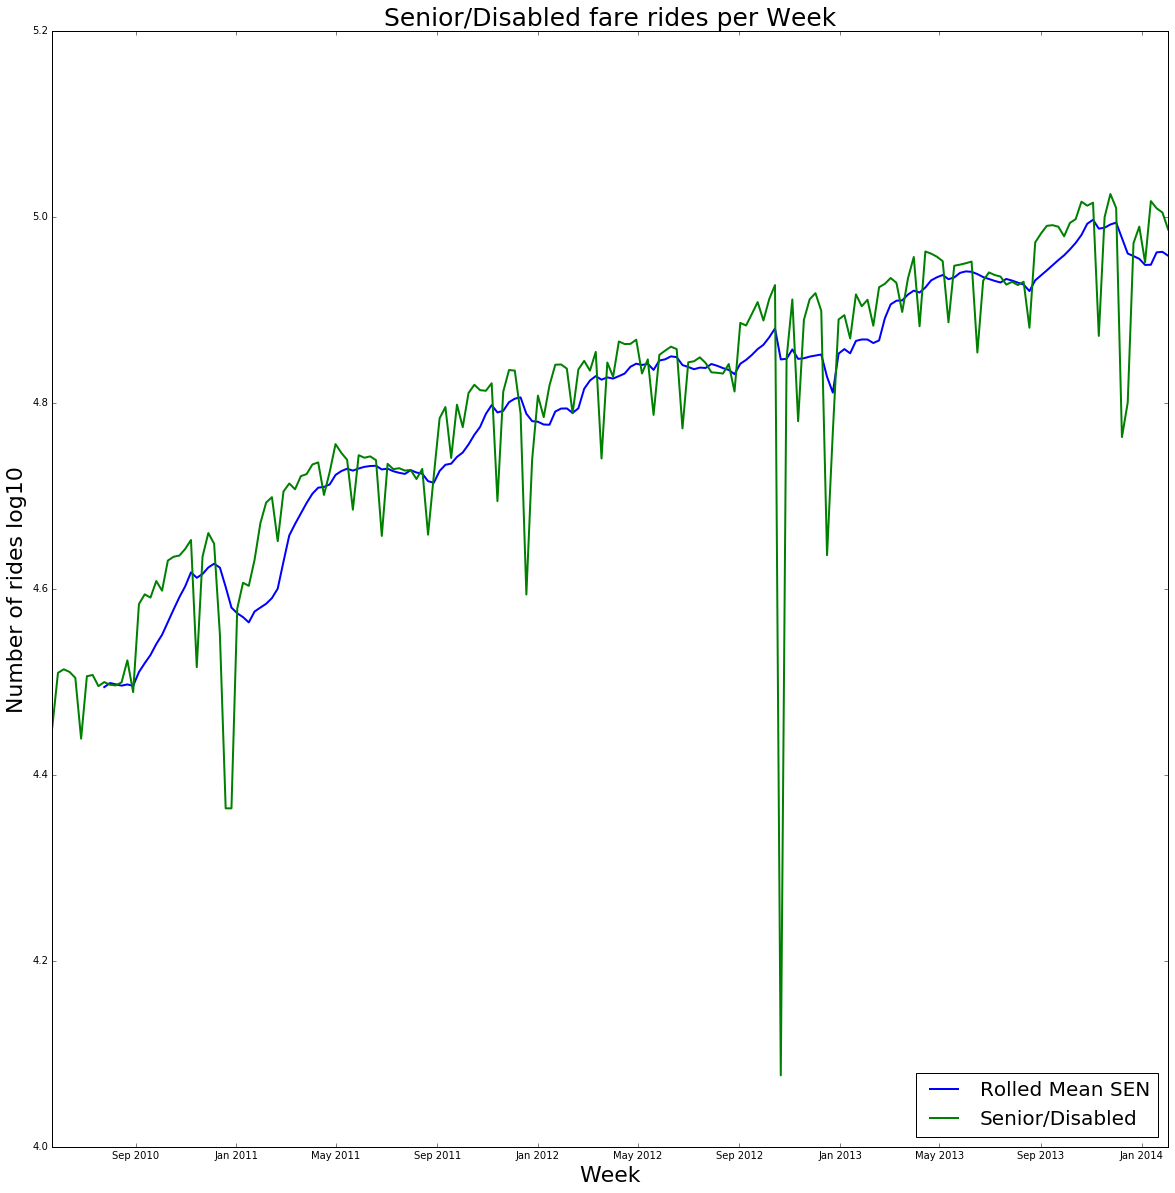

In [288]:
pl.figure(figsize=(20,20))
pl.title('Senior/Disabled fare rides per Week', size = 25)
pl.ylabel('Number of rides log10', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(faretype)):
    ### consider only faretype that have data for each week
    if (np.min(totalfaretype[i])>0):
        start = totalfaretype[i,:10].sum()
        end = totalfaretype[i,-10:].sum()
        ratio = end / start
        if (ratio > 2.6):
            pl.plot(rng, np.log10(pd.rolling_mean(totalfaretype[i], 10)), linewidth=2, alpha=1, label='Rolled Mean SEN')
            pl.plot(rng, np.log10((totalfaretype[i])), linewidth=2, alpha=1, label='Senior/Disabled')
        #print (start)
        #print (start)
            print ('The ratio of usage for the Senior/Disabled Fare is = ',ratio)
pl.legend(loc = 4, fontsize = 20)
pl.plot()

#### Figure 6.- Here we can see the steady increase in the usage of the SEN=Senior citizen/disabled Fare. It shows an increase of 2.9 times the usage shown at the begining of the period measured

[ 123134.  151948.  151538.  147094.  137888.  111425.  140932.  138075.
  136229.  134701.]
[ 95330.  43042.  44280.  97982.  97797.  73993.  97828.  87308.  82733.
  74272.]
The ratio of usage for the Montly Fare is =  0.578722384564


C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


[]

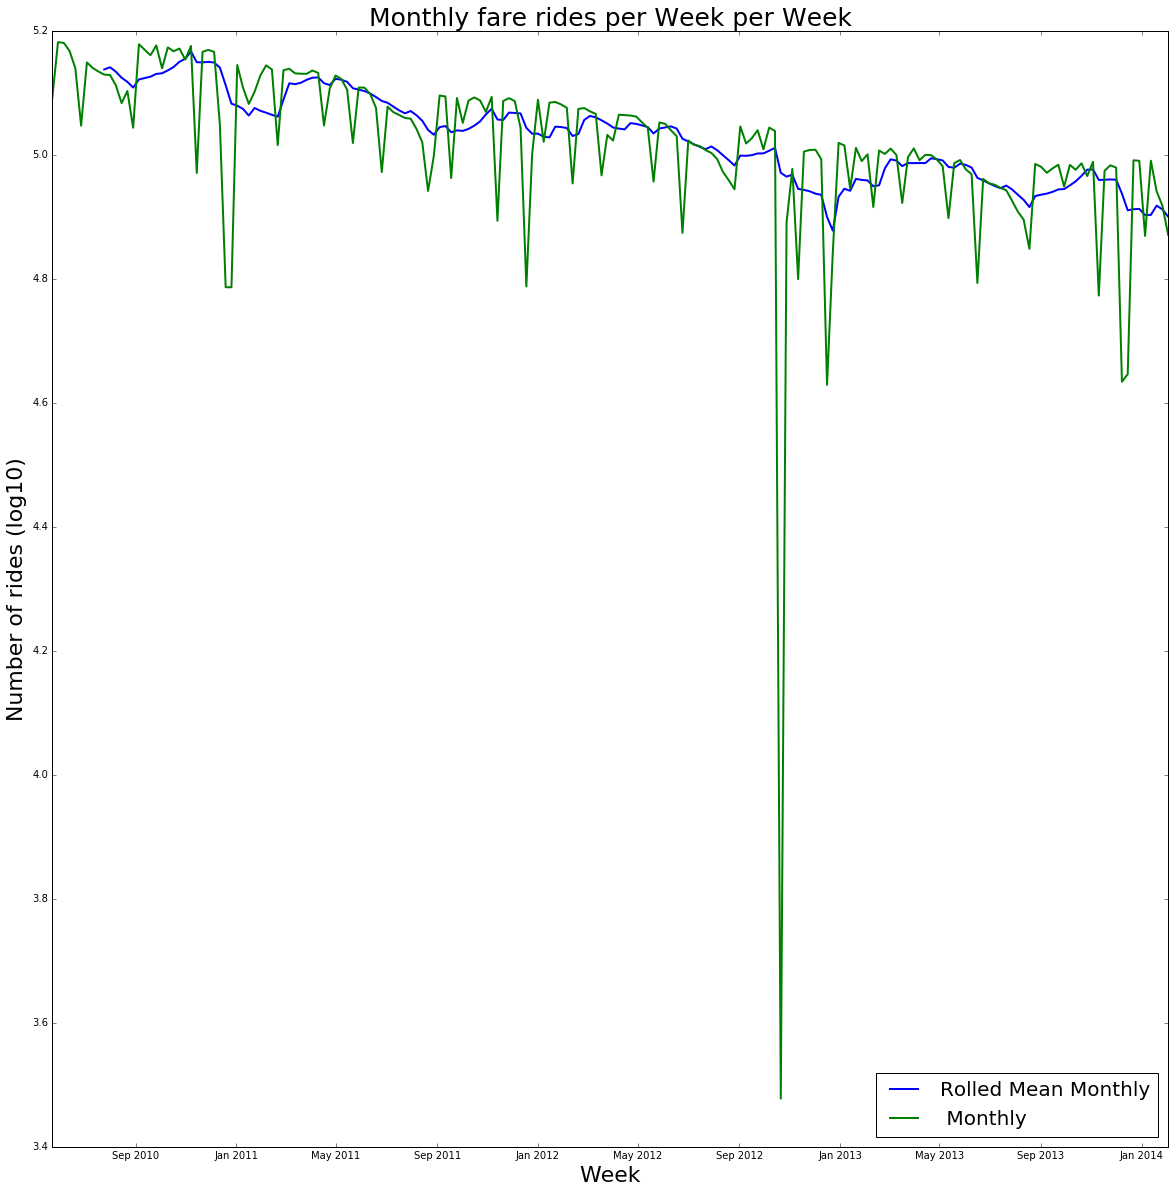

In [407]:
pl.figure(figsize=(20,20))
pl.title('Monthly fare rides per Week per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(faretype)):
    ### consider only faretype that have data for each week
    if (np.min(totalfaretype[i])>0):
        start = totalfaretype[i,:10].sum()
        end = totalfaretype[i,-10:].sum()
        ratio=end / start
        if (ratio < .6):
            pl.plot(rng, np.log10(pd.rolling_mean(totalfaretype[i], 10)), linewidth=2, alpha=1, label='Rolled Mean Monthly')
            pl.plot(rng, np.log10((totalfaretype[i])), linewidth=2, alpha=1, label=' Monthly')
            print (totalfaretype[i,:10])
            print (totalfaretype[i,-10:])
            
        #print (start)
            print ('The ratio of usage for the Montly Fare is = ',ratio)
pl.legend(loc = 4, fontsize = 20)
pl.plot()

#### Figure 6.- Here we can see the steady decrease in the usage of the Monthly Fare. It shows decrease of .57 times the usage shown at the begining of the period measured

## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [411]:
totalstation = np.nansum(MTAfare, axis=1)

(totalstation.shape)

(600L, 194L)

[]

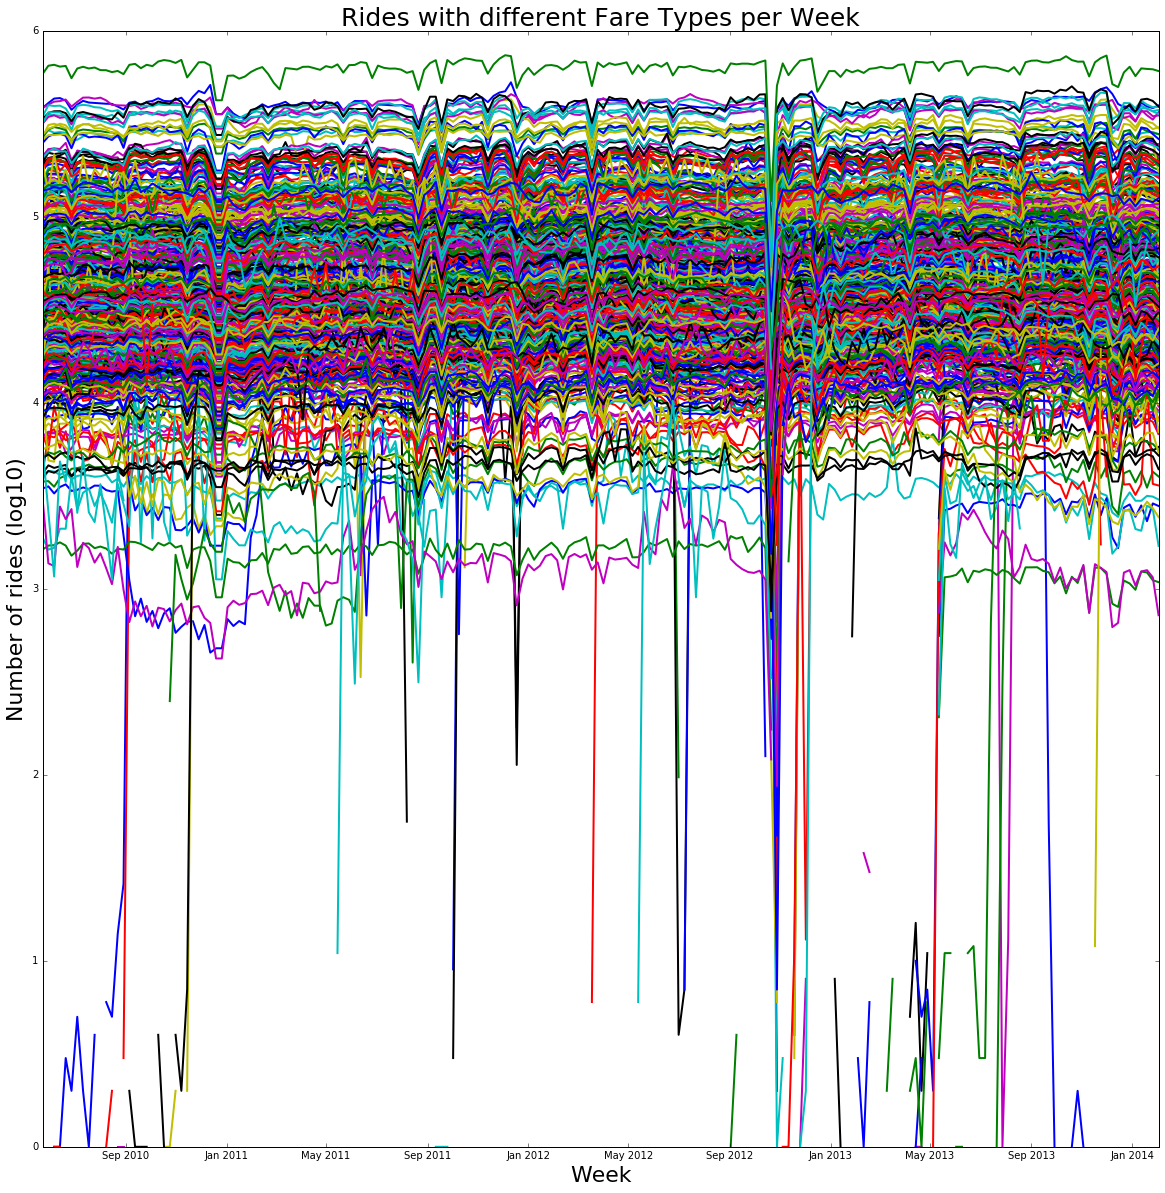

In [298]:
pl.figure(figsize=(20,20))
pl.title('Rides with different Station per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(totalstation)):
    pl.plot(rng, np.log10(totalstation[i]), linewidth=2, alpha=1)
pl.plot()

C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


[]

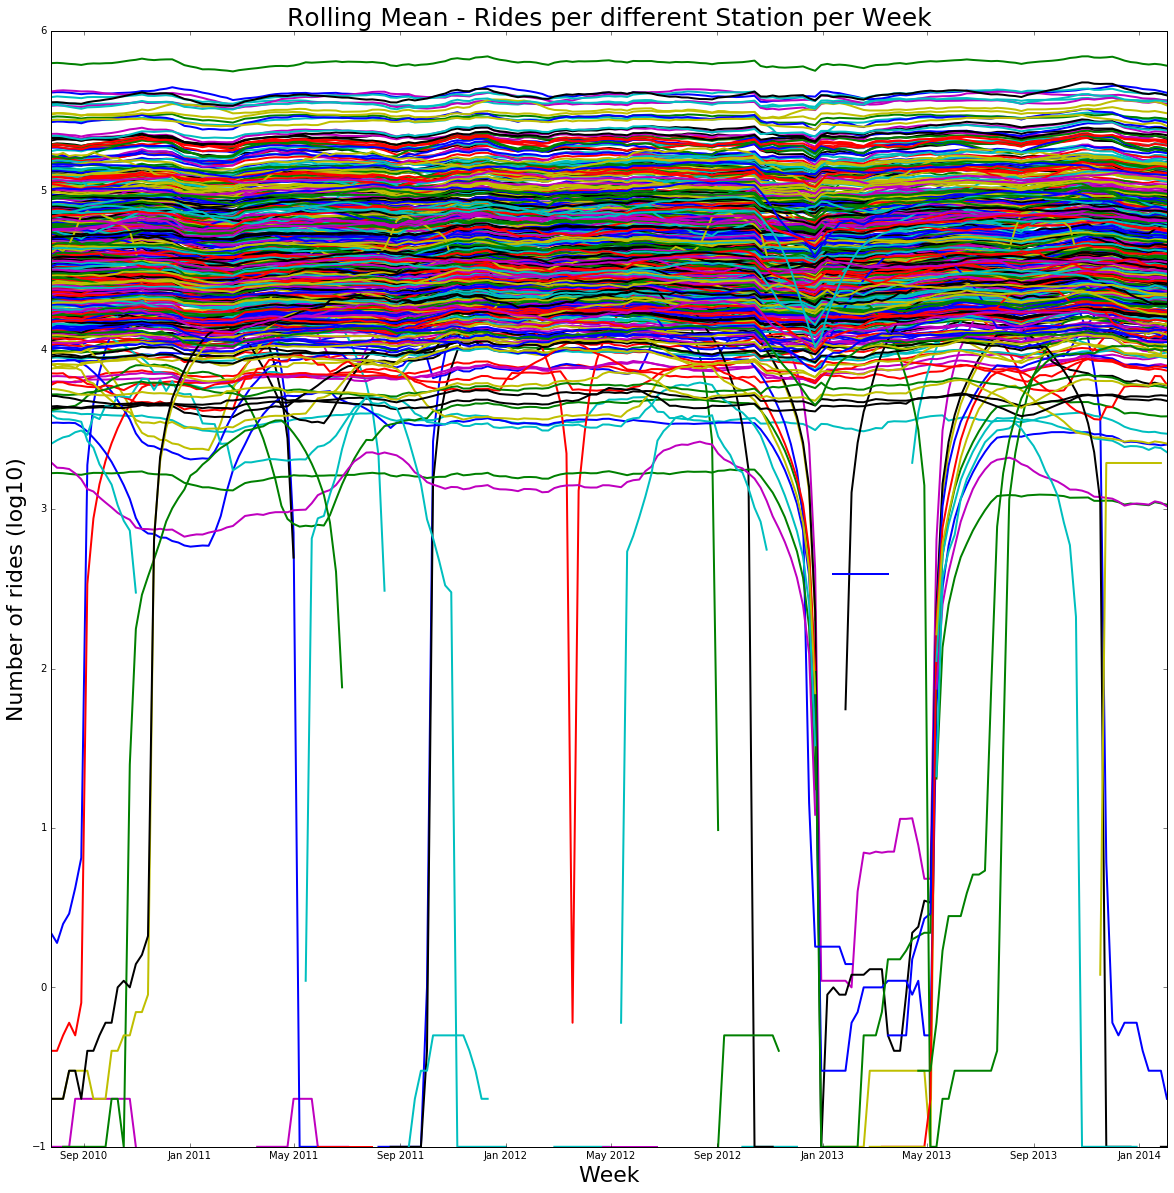

In [299]:
pl.figure(figsize=(20,20))
pl.title('Rolling Mean - Rides per different Station per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(totalstation)):
    pl.plot(rng, np.log10(pd.rolling_mean(totalstation[i], 10)), linewidth=2, alpha=1)
pl.plot()


In [381]:
(totalstation.shape)

(600L, 194L)

In [413]:
len(np.abs(np.fft.rfft(totalstation)))

f = np.fft.rfft(log10((pd.rolling_mean(totalstation, 10))))
N = len(totalstation[0])
period = len(totalstation[0])/52
sampling_rate= np.pi/period

C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


In [414]:

N

194

In [415]:
f.shape

(600L, 98L)

In [416]:
np.fft.rfftfreq(N, period).shape

(98L,)

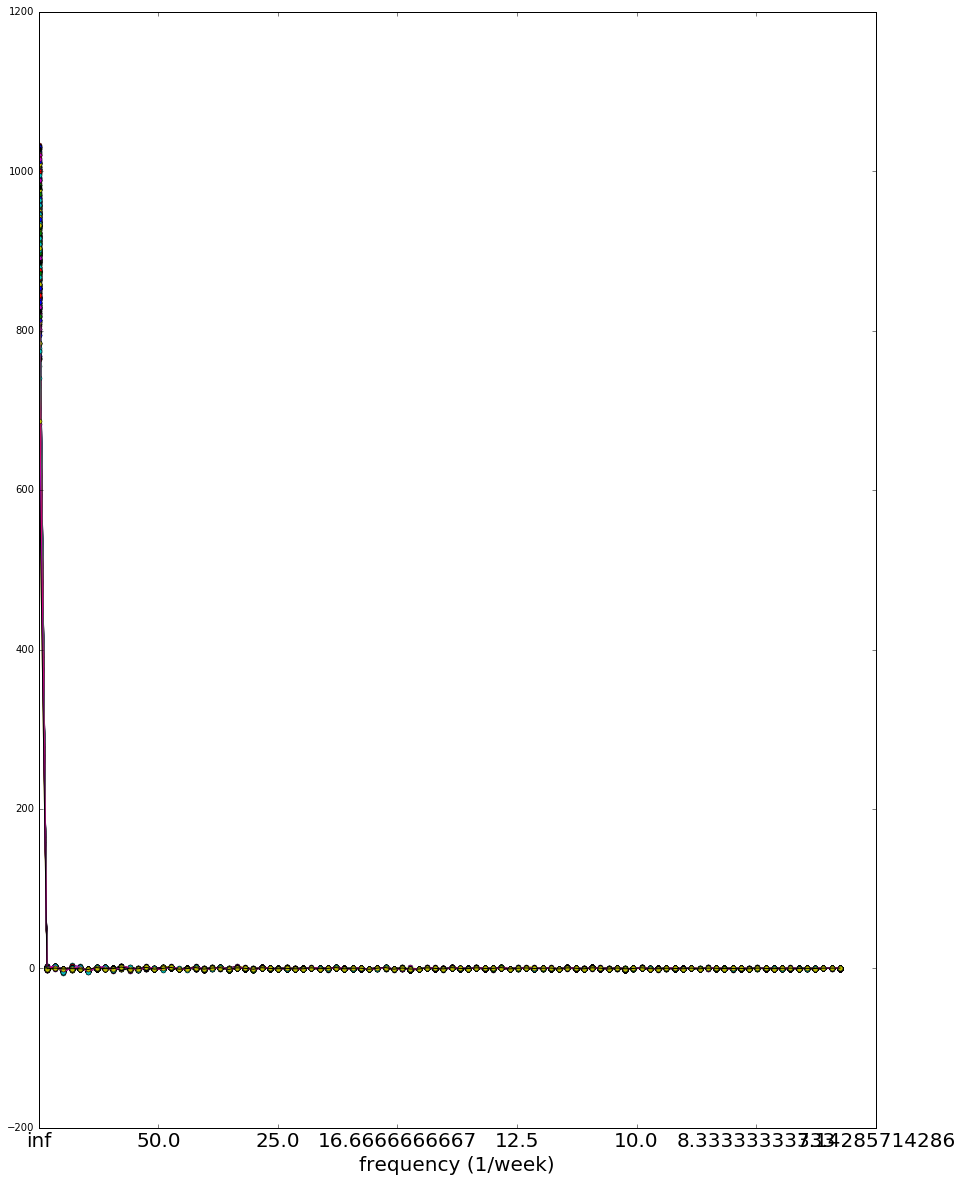

In [417]:
fig=pl.figure(figsize=(15,20))
ax=fig.add_subplot(111)
for i in range(len(totalstation)):
    ax.plot(np.fft.rfftfreq(N, period), (f[i]), 'o', ms=5)
    ax.plot(np.fft.rfftfreq(N, period), (f[i]), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20)

In [ ]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

print ("PERIOD = ", period)
ax = pl.plot(rng, totalstation[i])
#ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '.', ms=50, label= "period = ?");
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '-', label = "trash pickup");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("weeks since 2004-01-04", fontsize=20)
pl.ylabel("Tons of trash", fontsize=20)

ValueError: x and y must have same first dimension

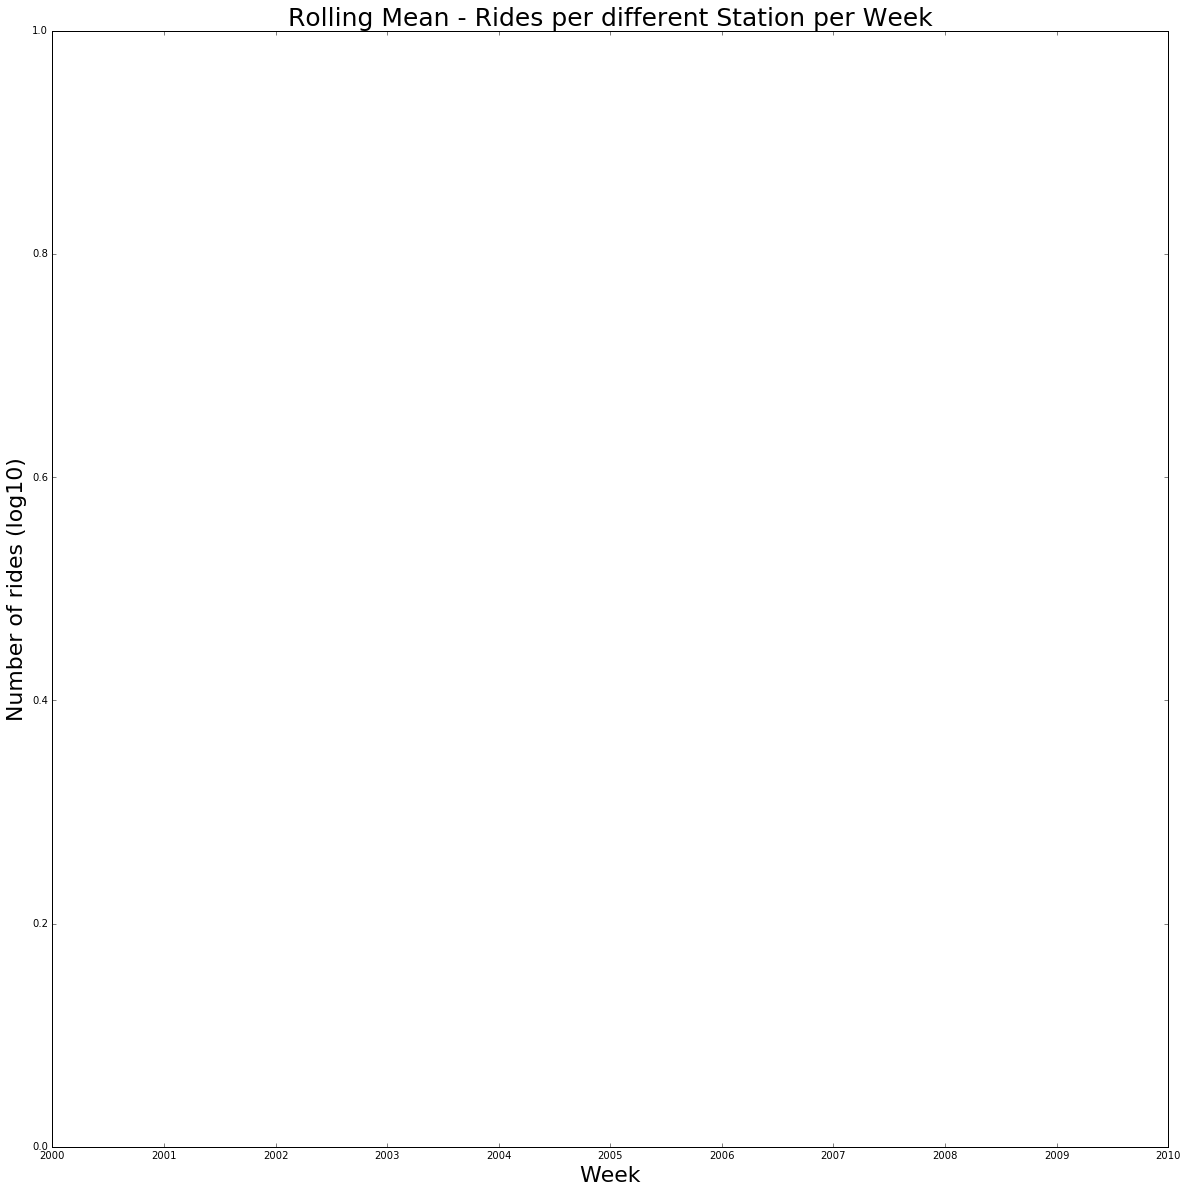

In [303]:
pl.figure(figsize=(20,20))
pl.title('Rolling Mean - Rides per different Station per Week', size = 25)
pl.ylabel('Number of rides (log10)', size = 22)
pl.xlabel('Week', size = 22)
for i in range(len(totalstation)):
    pl.plot(rng, np.log10(pd.rolling_mean(totalstation[i], 10)), linewidth=2, alpha=1)
pl.plot()


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

#i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

#removing empty light curves
```
tots = tots[tots.std(1)>0]
```

#with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

#and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

#then you can run:

```
km.fit(vals)
```

# HINTS: 


## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, dependingon the question) the appropriate dimension in different parts of the homework: when you need to work on the station level, collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average). The sum and average functions take an "axis" argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the dight axis.


# Possibly useful functions

I  used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
```
np.fft.rfft(mydata) 
```  

    will return the *real* part of the fourier transform (which is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math. All you need to know is that you need the real part). But what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the 
```
np.array.flatten()
np.array.reshape()
```
    array methods allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````



In [2]:
#after reading the datacube you should see:
mtaRides.shape


(600, 23, 194)

ride types list

In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

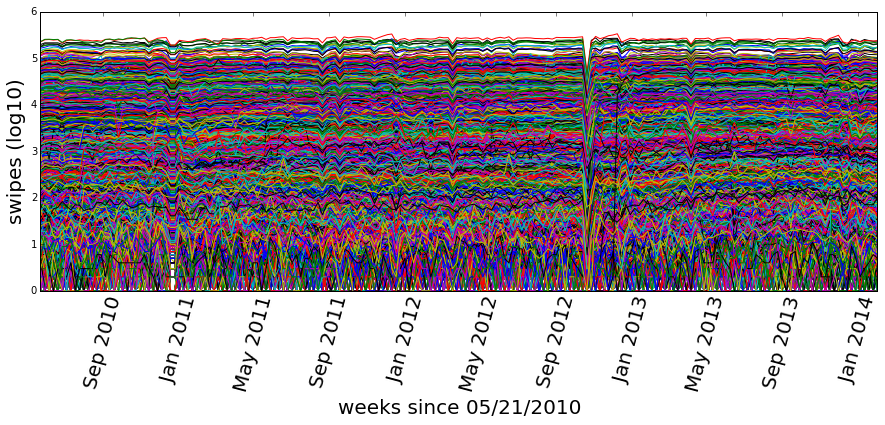

In [6]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


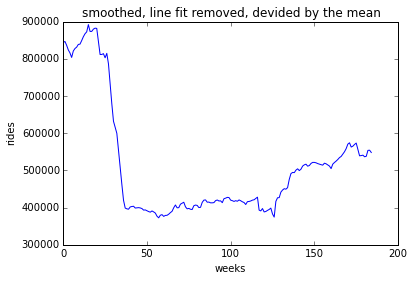

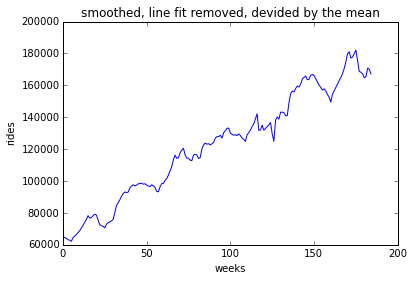

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

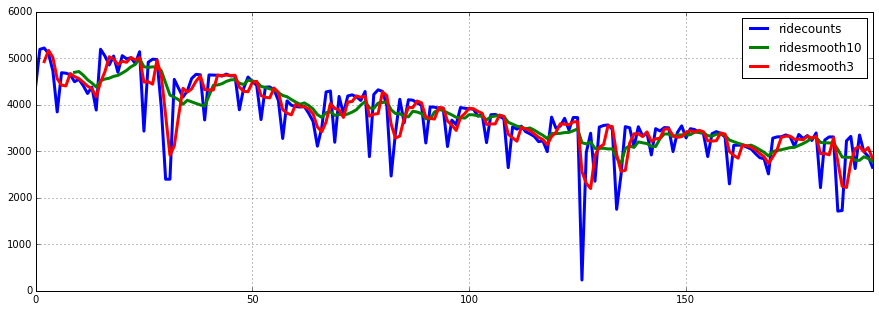

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

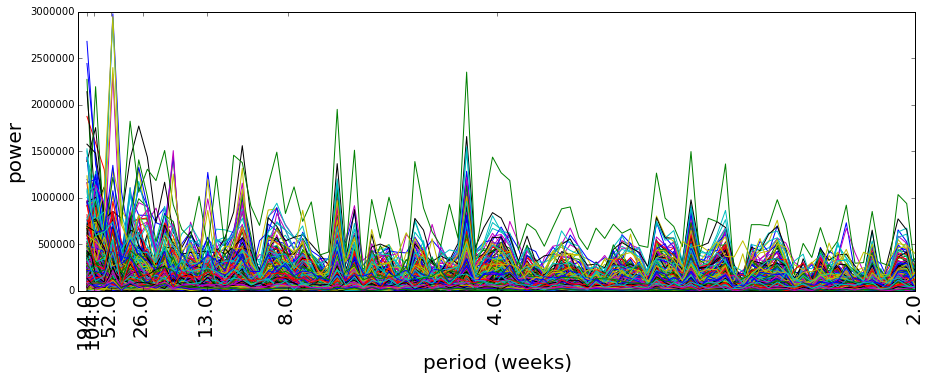

In [51]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

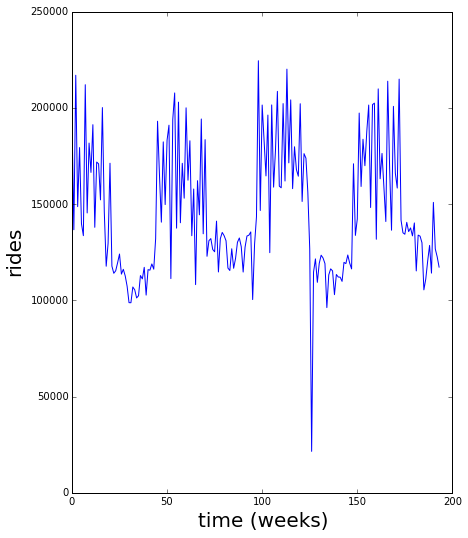

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space